In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

df= pd.read_csv("C:\\data science class\\assignments\\Timeseries\\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
df.isnull().sum()   #no null values in data

date       0
Ex_rate    0
dtype: int64

<Axes: >

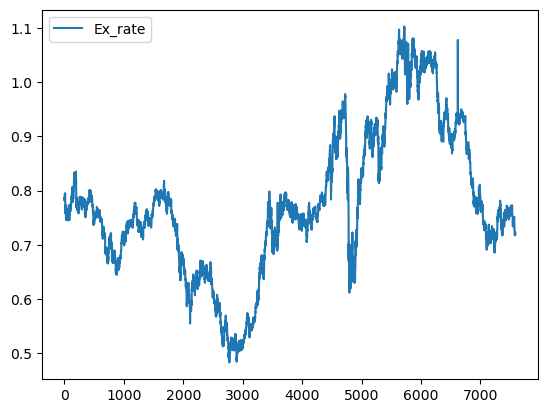

In [3]:
#EDA
df.plot()

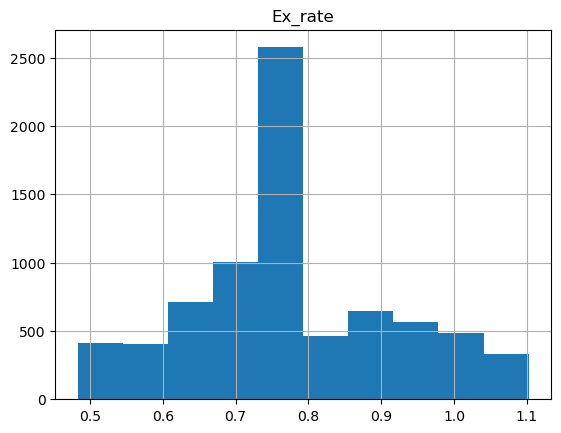

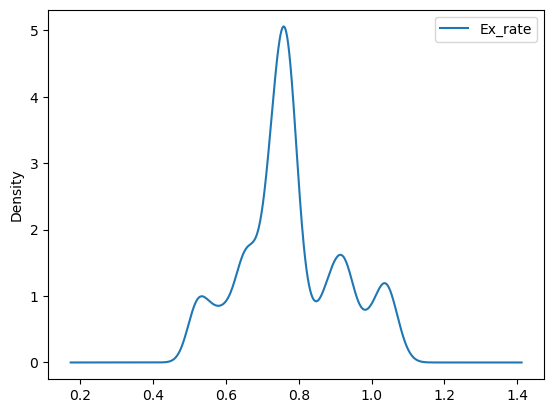

In [4]:
#histogram
df.hist()
plt.show()

#line plot
df.plot(kind='kde')
plt.show()

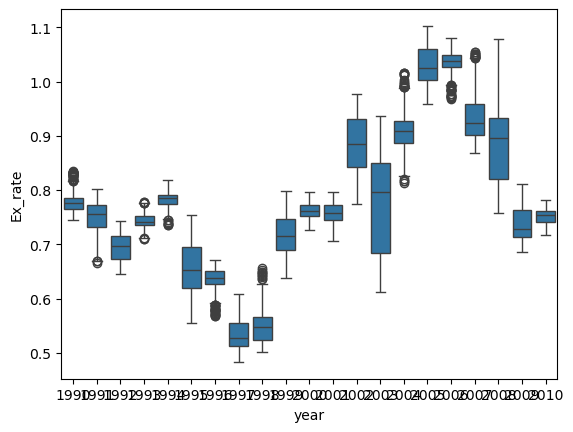

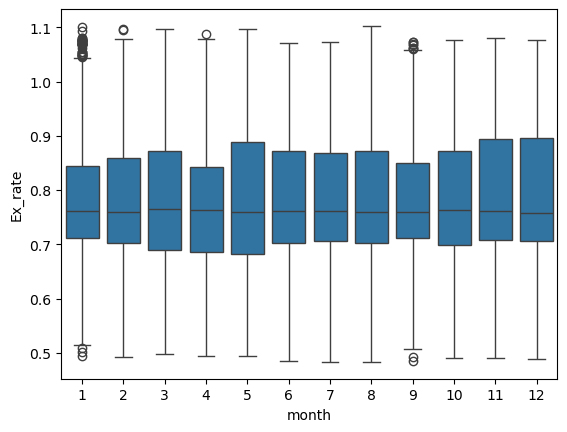

In [5]:
#boxplot
df['year']= pd.to_datetime(df['date'], format='mixed').dt.year  # extract the year from date and save into year column
df['month']= pd.to_datetime(df['date'], format='mixed').dt.month   # extract the month from date and save into month column
df
sns.boxplot(x='year',y='Ex_rate', data=df)
plt.show()

sns.boxplot(x='month',y='Ex_rate', data=df)
plt.show()

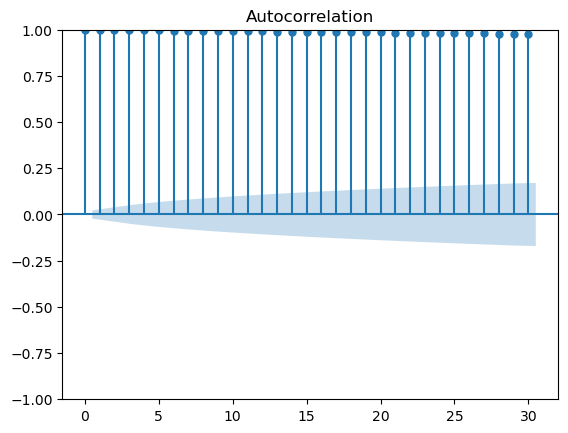

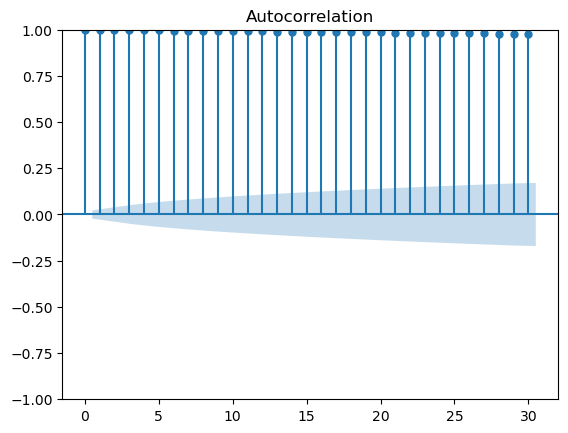

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Ex_rate'], lags=30)

In [6]:
# 1) AR model
model1 = ARIMA(df["Ex_rate"], order=(1,0,0))
result= model1.fit()
result.summary()

result.resid
mse_AR = np.mean(result.resid ** 2)
rmse_AR= np.round(np.sqrt(mse_AR), 8)
print("Root mean square error of AR model", rmse_AR)

# 2) MA model
model2 = ARIMA(df["Ex_rate"], order=(0,0,1))
result= model2.fit()
result.summary()

result.resid
mse_MA = np.mean(result.resid ** 2)
rmse_MA= np.round(np.sqrt(mse_MA), 8)
print("Root mean square error of MA model", rmse_MA)

# 3) ARIMA model
model3 = ARIMA(df["Ex_rate"], order=(1,0,1))
result= model3.fit()
result.summary()

result.resid
mse = np.mean(result.resid ** 2)
rmse= np.round(np.sqrt(mse), 8)
print("Root mean square error of ARIMA model",  rmse)

Root mean square error of AR model 0.00604776
Root mean square error of MA model 0.07075343
Root mean square error of ARIMA model 0.00599633


In [4]:
p_value= range(0, 5)
d_value= range(0, 5)
q_value= range(0, 5)
best_rmse= rmse
for p in p_value:
    for d in d_value:
        for q in q_value:
            model3 = ARIMA(df["Ex_rate"], order=(p,d,q))
            result= model3.fit()
            
            mse = np.mean(result.resid ** 2)
            rmse= np.round(np.sqrt(mse), 8)
            if rmse< best_rmse:
                best_rmse=rmse
                best_order = (p,d,q)

print("Root mean square error of ARIMA model",  rmse, "order:", best_order)
            

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: N

Root mean square error of ARIMA model 0.0187111 order: (3, 0, 3)


In [18]:
# Simple Exponential Smoothing Model
# =========================================================================
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = SimpleExpSmoothing(df['Ex_rate'])
model_fitted = model.fit(optimized=True)
# Forecast for the next steps (e.g., next 5 periods)
forecast = model_fitted.forecast(steps=5)

rmse = np.sqrt(np.mean(model_fitted.resid**2))
print("RMSE", np.round(rmse, 5))

RMSE 0.006


In [17]:
# double exponential smoothing
# =========================================================================
# Holt's Linear Trend Model
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
model_fitted = model.fit(optimized=True)

# Forecast for the next steps (e.g., next 5 periods)
forecast = model_fitted.forecast(steps=5)

rmse  = np.sqrt(np.mean(model_fitted.resid**2)) 
print("RMSE",np.round(rmse,5))


RMSE 0.006


In [24]:
# =========================================================================
# triple exponential smoothing
# =========================================================================
# Holt's  winter Model
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add',seasonal_periods=6)
model_fitted = model.fit(optimized=True)

# Forecast for the next steps (e.g., next 5 periods)
forecast = model_fitted.forecast(steps=5)

rmse  = np.sqrt(np.mean(model_fitted.resid**2)) 
print("RMSE",np.round(rmse,5))

RMSE 0.00599
